In [21]:
import sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import odeint

In [3]:
mass = np.matrix(np.diag([4,3])); mass

matrix([[4, 0],
        [0, 3]])

In [5]:
stiff = np.matrix([[2, -1],[-1, 1]]); stiff

matrix([[ 2, -1],
        [-1,  1]])

In [8]:
W2, F1 = np.linalg.eig(np.linalg.solve(mass,stiff)) # eigenanalysis
ix = np.argsort(np.absolute(W2)) # sort eigenvalues in ascending order
W2 = W2[ix] # sorted eigenvalues
F1 = F1[:,ix] # sorted eigenvectors
W2

array([0.11620406, 0.71712927])

In [9]:
F1

matrix([[ 0.54580557,  0.75499722],
        [ 0.83791185, -0.65572799]])

In [10]:
omega=np.sqrt(W2); omega

array([0.34088717, 0.84683486])

# Non-prop Damping

In [11]:
damp = np.matrix([[0.4, -0.1],[-0.1, 0.1]]); damp

matrix([[ 0.4, -0.1],
        [-0.1,  0.1]])

In [13]:
A = np.bmat([[np.zeros_like(mass), np.identity(mass.shape[0])], [np.linalg.solve(-mass,stiff), np.linalg.solve(-mass,damp)]]); A

matrix([[ 0.        ,  0.        ,  1.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ],
        [-0.5       ,  0.25      , -0.1       ,  0.025     ],
        [ 0.33333333, -0.33333333,  0.03333333, -0.03333333]])

In [15]:
w2, v2 = np.linalg.eig(A)
ix = np.argsort(np.absolute(w2))
w2 = w2[ix]
v2 = v2[:,ix]
w2

array([-0.01485073+0.34072778j, -0.01485073-0.34072778j,
       -0.05181594+0.8448399j , -0.05181594-0.8448399j ])

In [16]:
v2

matrix([[-0.51643643+0.01467417j, -0.51643643-0.01467417j,
          0.57685854+0.j        ,  0.57685854-0.j        ],
        [-0.79302069+0.j        , -0.79302069-0.j        ,
         -0.49859282+0.03522561j, -0.49859282-0.03522561j],
        [ 0.00266956-0.17618216j,  0.00266956+0.17618216j,
         -0.02989047+0.48735311j, -0.02989047-0.48735311j],
        [ 0.01177693-0.27020418j,  0.01177693+0.27020418j,
         -0.00392494-0.42305636j, -0.00392494+0.42305636j]])

In [17]:
zw = -w2.real # damping coefficient time angular frequency
wD = w2.imag # damped angular frequency
zn = 1./np.sqrt(1.+(wD/-zw)**2) # the minus sign is formally correct!
wn = zw/zn # undamped angular frequency
print('Angular frequency: {}'.format(wn[[0,2]]))
print('Damping coefficient: {}'.format(zn[[0,2]]))

Angular frequency: [0.34105126 0.84642741]
Damping coefficient: [0.04354398 0.06121723]


In [18]:
AA = v2[:2,[0,2]]
AB = AA.conjugate()
BA = np.multiply(AA,w2[[0,2]])
BB = BA.conjugate()
v2_new = np.bmat([[AA, AB], [BA, BB]])
print(np.round_(v2_new[:,[0,2,1,3]], 4))

[[-0.5164+0.0147j -0.5164-0.0147j  0.5769+0.j      0.5769-0.j    ]
 [-0.793 +0.j     -0.793 -0.j     -0.4986+0.0352j -0.4986-0.0352j]
 [ 0.0027-0.1762j  0.0027+0.1762j -0.0299+0.4874j -0.0299-0.4874j]
 [ 0.0118-0.2702j  0.0118+0.2702j -0.0039-0.4231j -0.0039+0.4231j]]


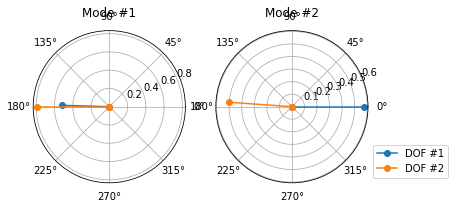

In [19]:
fig, ax = plt.subplots(1, 2, subplot_kw=dict(polar=True))
for mode in range(2):
    ax[mode].set_title('Mode #{}'.format(mode+1))
    for dof in range(2):
        r = np.array([0, np.absolute(v2[dof,2*mode])])
        t = np.array([0, np.angle(v2[dof,2*mode])])
        ax[mode].plot(t, r, 'o-', label='DOF #{}'.format(dof+1))
plt.legend(loc='lower left', bbox_to_anchor=(1., 0.))
plt.show()

# DMD Verification

In [45]:
fs=256
t_end=150
timesteps=fs*t_end
t=np.linspace(0,t_end,timesteps)
D=np.zeros((4,1))
B=np.array([[1],[1],[0],[0]])
sys=signal.StateSpace(A,B,np.identity(4),B)

In [46]:
t2,y2 = signal.step(sys)

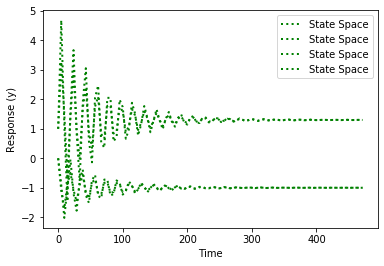

In [47]:
plt.figure(1)
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')

plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')

plt.show()